In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('archive.csv')
df.head(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [3]:
display(len(df))

display(df['Sex'].value_counts())

df['Birth Country'].value_counts().head(10)

969

Male      893
Female     50
Name: Sex, dtype: int64

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

In [4]:
df['usa_winner'] = df['Birth Country'] == 'United States of America'
df['decade'] = (np.floor(df['Year'] / 10 ) * 10 ).astype(int)
usa_winners = df.groupby('decade',as_index=False)['usa_winner'].mean()

usa_winners

,decade,usa_winner
0,1900,0.017241
1,1910,0.075000
2,1920,0.074074
3,1930,0.241935
4,1940,0.288889
5,1950,0.278481
6,1960,0.262500
7,1970,0.308411
8,1980,0.313131
9,1990,0.392523


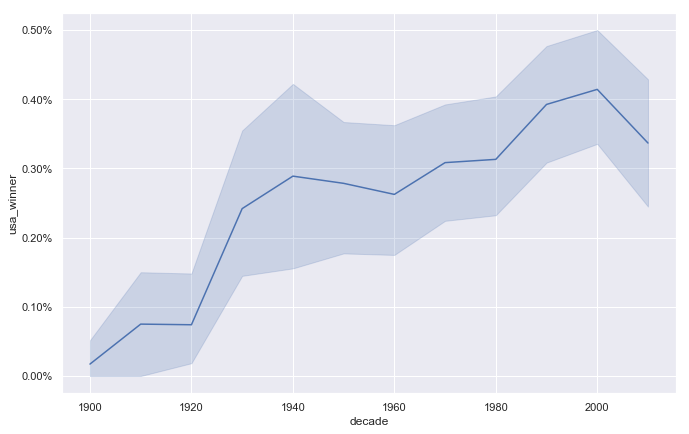

In [7]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=df["decade"], y=df["usa_winner"])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

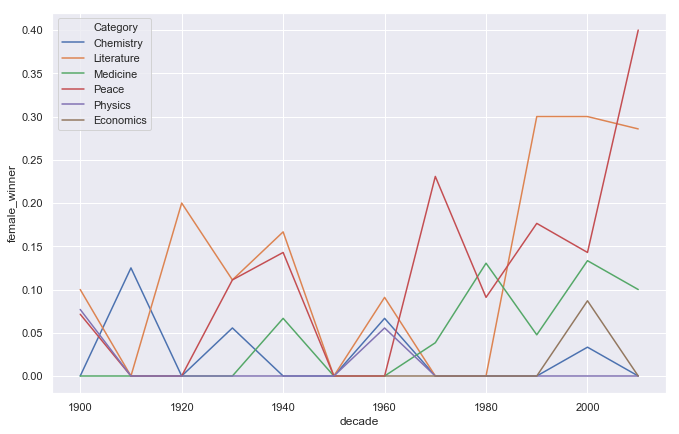

In [11]:
df['female_winner'] = df['Sex'] == 'Female'

female_winners = df.groupby(['decade','Category'],as_index=False)['female_winner'].mean()

ax = sns.lineplot(x='decade',y='female_winner',hue='Category',data=female_winners)

In [12]:
# Picking out the first woman to win the Nobel Prize
df1 = df[df['Sex'] == "Female"]
df1.nsmallest(1,'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [16]:
df.groupby("Full Name").filter(lambda x:len(x) >=2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),...,Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
157,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,...,Male,University of Heidelberg,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,False,1930,False
158,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,...,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,1940-04-26,Heidelberg,Germany,False,1930,False
159,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",...,Male,University of Heidelberg,Heidelberg,Germany,1949-03-30,Buenos Aires,Argentina,False,1930,False
160,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",...,Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,1949-03-30,Buenos Aires,Argentina,False,1930,False
179,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,"""for their discoveries concerning liver therap...",1/3,328,Individual,William Parry Murphy,1892-02-06,"Stoughton, WI",...,Male,Harvard University,"Cambridge, MA",United States of America,1987-10-09,"Brookline, MA",United States of America,True,1930,False


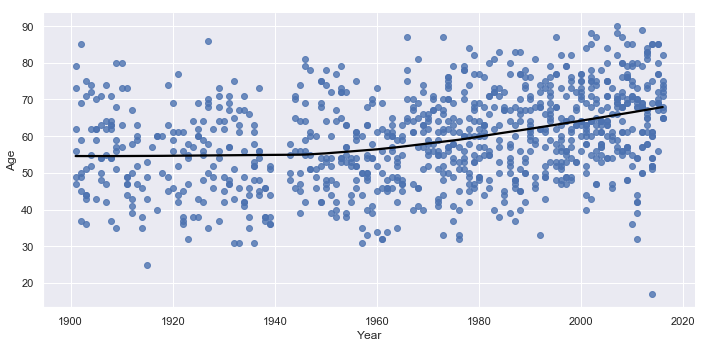

In [39]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'],yearfirst=True,errors="coerce")
df['Age'] = df['Year'] - df['Birth Date'].dt.year
sns.lmplot(x="Year",y="Age",data=df,lowess=True,aspect=2,line_kws={"color":"black"})

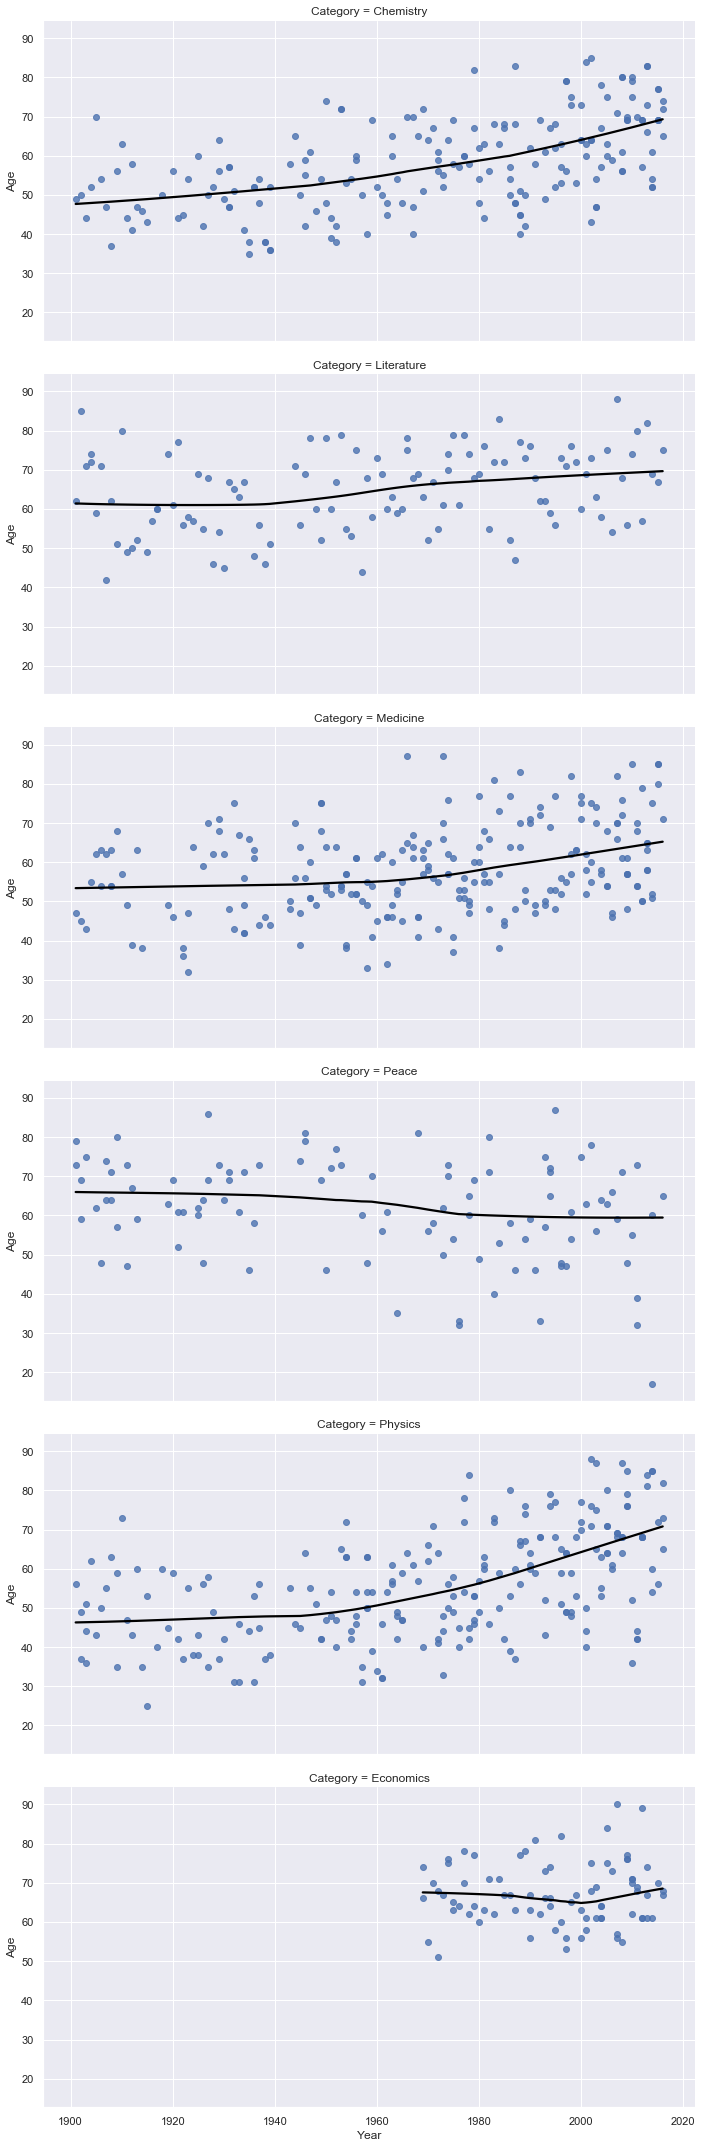

In [40]:
sns.lmplot(x="Year",y="Age",data=df,row="Category",lowess=True,aspect=2,line_kws={'color':'black'})

In [44]:
display(df.nlargest(1,"Age"))

df.nsmallest(1,"Age")

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_winner,decade,female_winner,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_winner,decade,female_winner,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
